# A continuación se hará un análisis exploratorio del archivo Installs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

In [3]:
installs = pd.read_csv('./datos/installs.csv')

### Análisis del tipo de datos

Primero que nada, vamos a ver como está organizada la información y que tipo de datos les asigna Pandas a cada columna.

Podemos ver que el archivo cuenta con **3.412 filas** y **18 columnas**.

In [4]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


Gracias a la información del archivo, podemos ver que la columna ***click_hash*** tiene todos los valores nulos, por lo que podemos eliminar dicha columna para liberar el espacio que ocupa y no la vamos a analizar ya que los datos no son válidos.

In [5]:
installs = installs.drop(['click_hash'], axis='columns')

Si analizamos la columna ***device_countrycode*** podemos observar que solo tenemos dos posibles valores, por lo que podemos cambiar el tipo de dato a **Category**, para reducir el tamaño del archivo.

También lo realizaremos con:
+ ***ref_type*:** que puede tomar como valor **Apple IFA** o **Google Advertising ID**
+ ***application_id*:** que representa el id interno que se le da a la aplicación instalada.
+ ***kind*:** que indica el tipo de instalación.
+ ***session_user_agent*:** que se refiere al agente de usuario utilizado para la instalación en cuestión.

In [6]:
installs['device_countrycode'].value_counts()

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

In [7]:
installs['ref_type'].value_counts()

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

In [8]:
installs['application_id'].value_counts()

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64

In [9]:
installs['kind'].value_counts()

af_app_opened                 428
app_open                      212
EVENT_Homepage                 70
open                           36
EVENT_OPEN_APP                 33
Open                           22
login_success                  17
account_summary_first_step     13
EVENT_HOMEPAGE                  6
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
registration                    3
payment method add              3
journey first drop off          2
install                         1
journey drop off                1
journey reserved                1
EVENT_PROMO                     1
af_list_view                    1
Name: kind, dtype: int64

In [10]:
installs['session_user_agent'].value_counts()

http-kit/2.0                                                                                                                                                                                                                                                                  1729
adjust.com                                                                                                                                                                                                                                                                    1592
HasOffers Mobile AppTracking v1.0                                                                                                                                                                                                                                               22
Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1                                      

In [11]:
installs['device_countrycode'] = installs['device_countrycode'].astype('category')
installs['ref_type'] = installs['ref_type'].astype('category')
installs['application_id'] = installs['application_id'].astype('category')
installs['kind'] = installs['kind'].astype('category')
installs['session_user_agent'] = installs['session_user_agent'].astype('category')

Por otra parte, la columna ***wifi*** indica si la instalación se realizó con conexión WiFi y casi la mitad de los valores son nulos, por lo que vamos a cambiarle el tipo también a **category** y agregandole el valor **Unknown** en que de que haya un nulo. 

Entonces, los posibles valores serían: True, False o Unknown

In [12]:
installs['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [13]:
installs.fillna({'wifi': 'Unknown'}, inplace = True)
installs['wifi'] = installs['wifi'].astype('category')

In [14]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 17 columns):
created               3412 non-null object
application_id        3412 non-null category
ref_type              3412 non-null category
ref_hash              3412 non-null int64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null category
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  3412 non-null category
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), category(6), float64(3), int64(2), object(4)
memory usage: 269.6+ KB


In [15]:
installs['device_language'].value_counts()

3.301378e+18    1484
9.028383e+18     714
4.621024e+18     632
6.977049e+18     238
4.077062e+17      70
1.526421e+18      56
4.060930e+18      48
2.822843e+17      39
6.035180e+18      24
1.193279e+18      21
6.535228e+18      10
1.101539e+17       9
3.177265e+18       5
3.695787e+17       5
3.095856e+18       4
6.569908e+18       2
5.846217e+18       2
7.774316e+18       2
4.594650e+18       2
6.782349e+18       1
5.061642e+18       1
1.686906e+18       1
5.794427e+17       1
2.488366e+18       1
3.544544e+18       1
3.074904e+18       1
2.061937e+18       1
4.073835e+18       1
6.846873e+18       1
7.045130e+18       1
Name: device_language, dtype: int64

In [16]:
installs['device_language'] = installs['device_language'].astype('category')

In [17]:
installs['device_brand'].value_counts()
installs['device_brand'] = installs['device_brand'].astype('category')

In [18]:
installs['user_agent'].value_counts()

MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0                                 393
MercadoPago/2.59.0.1 CFNetwork/976 Darwin/18.2.0                                 141
MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0                                  89
Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-G610M Build/M1AJQ)                      37
Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G532MT Build/MMB29T)                    36
Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-J500M Build/MMB29M)                     36
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G570M Build/R16NW)                      28
Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G532M Build/MMB29T)                     22
Dalvik/2.1.0 (Linux; U; Android 7.0; LG-M250 Build/NRD90U)                        18
Dalvik/2.1.0 (Linux; U; Android 6.0; MotoG3 Build/MPIS24.65-33.1-2-16)            17
Dalvik/2.1.0 (Linux; U; Android 7.1.1; Moto G Play Build/NPIS26.48-43-2)          17
Dalvik/2.1.0 (Linux; U; Android 6.0; LG-K430 Build/MRA58K)       

Analizando la columna ***attributed*** podemos ver que ninguna de las instalaciones surgidas se le atribuyeron a Jampp.

In [19]:
installs['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

Luego viendo los valores que toma la columna ***implicit*** obtenemos que un poco más de 2547 instalaciones se no realizaron de manera implícita, y 865 sí se instalaron a través de la publicidad mostrara.

Estos valores junto con los de la columna anterior podemos deducir varias posibilidades. Que aquellas instalaciones implícitas pertenezcan a la competencia de Jampp, o bien, que hubo un error y no se vinculó correctamente la atribución de las instalaciones en cuestión. 

In [20]:
installs['implicit'].value_counts()

False    2547
True      865
Name: implicit, dtype: int64

In [21]:
installs.sample(5)

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
1992,2019-03-09 17:17:44.984,7,1891515180541284343,3780617672800673169,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,Unknown,NaN,2042007989341979328,3.301378e+18
2474,2019-03-11 00:17:08.797,6,1494519392962156891,543788397291067494,False,False,6333597102633388268,5.951325e+18,2.928262e+18,NaN,NaN,NaN,NaN,Unknown,NaN,8868070653532682924,NaN
3114,2019-03-12 10:07:29.713,10,1891515180541284343,4625320897116007621,False,False,6333597102633388268,2.208835e+18,4.801467e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 6.0; MotoG3 Bu...,NaN,NaN,True,NaN,4809467268543618454,9.028383e+18
2150,2019-03-06 17:27:37.160,26,1494519392962156891,4278406482191700207,False,False,2970470518450881158,NaN,1.187661e+17,adjust.com,NaN,NaN,NaN,Unknown,NaN,1014581662506289794,4.060930e+18
1517,2019-03-09 00:23:33.642,20,1494519392962156891,7286970353123718613,False,False,2970470518450881158,NaN,9.149036e+18,adjust.com,NaN,NaN,NaN,Unknown,NaN,4624072678040389459,3.301378e+18


Si analizamos la columna ***ref_hash*** podemos observar que el dispositivo que mayor instaló aplicaciones lo hizo 4 veces, y que la mayoría lo hizo solo una vez. Esto es lógico ya que, generalmente, no se suele instalar aplicaciones a través de una publicidad.

In [22]:
installs['ref_hash'].value_counts().describe()

count    3008.000000
mean        1.134309
std         0.366424
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: ref_hash, dtype: float64

Como se puede ver, solo ***2 personas*** instalaron 4 aplicaciones mientras que ***2.629 personas*** instalaron solo una vez.

In [23]:
installs_per_device = installs.groupby('ref_hash').size().reset_index()
installs_per_device = installs_per_device.rename(index=str, columns={installs_per_device.columns[1]: 'Cantidad_Instalaciones'})
cant_installs = installs_per_device.groupby('Cantidad_Instalaciones').size().reset_index()
cant_installs = cant_installs.rename(index=str, columns={cant_installs.columns[1]: 'Cantidad_Personas'})
cant_installs

,Cantidad_Instalaciones,Cantidad_Personas
0,1,2629
1,2,356
2,3,21
3,4,2


Analizando la última columna que nos queda por analizar (***created***), podemos ver que se trata de la fecha en que se realizó la installación de una aplicación y que Pandas la interpetró como **object**.

Para entender y analizar mejor los datos, vamos a dividir dicha columna en ***year***, ***month***, ***day***, ***weekday*** y ***hour***. Para ello primero debemos transformar la columna ***created*** al tipo datetime.

In [24]:
installs['created'] = pd.to_datetime(installs['created'])

In [25]:
installs['year'] = installs['created'].dt.year
installs['month'] = installs['created'].dt.month
installs['day'] = installs['created'].dt.day
installs['weekday'] = installs['created'].apply(lambda x: x.day_name())
installs['hour'] = installs['created'].dt.hour

#### Ahora bien, vamos a analizar las columnas creadas.

In [26]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 22 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null category
ref_type              3412 non-null category
ref_hash              3412 non-null int64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null category
device_brand          1047 non-null category
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  3412 non-null category
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null category
year                  3412 non-null int64
month                 3412 non-null int64
day                   3412 non-null int64
weekday               

In [27]:
installs['year'].value_counts()

2019    3412
Name: year, dtype: int64

In [28]:
installs['month'].value_counts()

3    3412
Name: month, dtype: int64

Tanto para la columna ***year*** como para ***month***, podemos ver que cada una solo tiene un valor posible, siendo 2019 el año y 3 para el mes, es decir, que los datos representados en nuetro archivo corresponden al mes de Marzo de 2019. Por lo que podemos eliminar dichas columnas, teniendo en cuenta al final, que el análisis corresponde a dicho período de tiempo

In [29]:
installs = installs.drop(['year'], axis='columns')
installs = installs.drop(['month'], axis='columns')

Por otro lado, las columnas ***day*** y ***hour*** son valores númericos pero no es necesario representarlos como un **int64**. Por ende cambiaremos el tipo a **int8** para reducir el tamaño del archivo.

In [30]:
installs['day'] = installs['day'].astype(np.int8)
installs['hour'] = installs['hour'].astype(np.int8)

Si analizamos las fechas de los datos presentes en el archivo en cuestión, podemos determinar que corresponden al período que va del día 5 al 13 de Marzo de 2019. En el cual tenemos dos días Miércoles y dos Jueves.

In [31]:
installs.groupby('weekday')['day'].value_counts()

weekday    day
Friday     8      366
Monday     11     377
Saturday   9      368
Sunday     10     351
Thursday   7      393
Tuesday    12     472
           5      337
Wednesday  13     423
           6      325
Name: day, dtype: int64

In [32]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 20 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null category
ref_type              3412 non-null category
ref_hash              3412 non-null int64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null category
device_brand          1047 non-null category
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  3412 non-null category
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null category
day                   3412 non-null int8
weekday               3412 non-null object
hour                  3412 non-null int8
dtypes: bool(2), catego

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Análisis de datos

#### 1 - Cantidad de instalaciones por día

1.1 Cantidad de instalaciones por día (número de día)

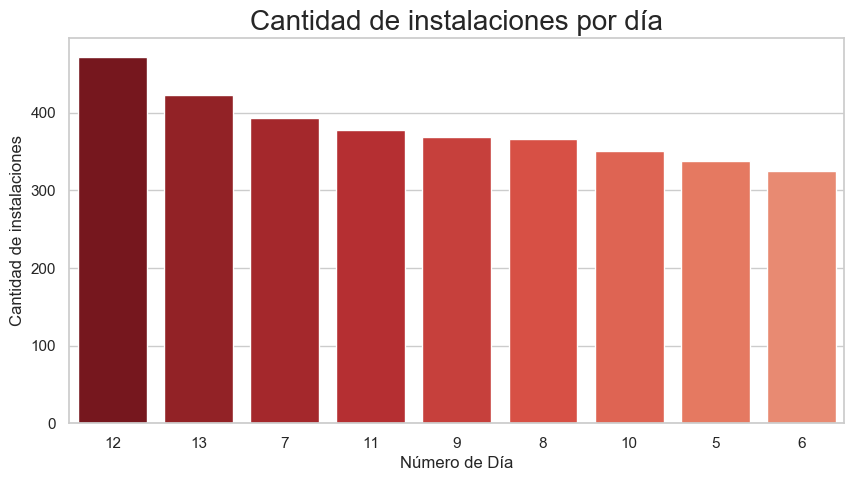

In [33]:
serie_installs_per_day = installs['day'].value_counts()

g = sns.barplot(y=serie_installs_per_day.values, x=serie_installs_per_day.index, \
                palette=sns.color_palette("Reds_r", 15), order=serie_installs_per_day.index);
g.set_title('Cantidad de instalaciones por día', fontsize=20);
g.set_xlabel('Número de Día');
g.set_ylabel('Cantidad de instalaciones');

1.2 Cantidad de instalaciones por día de la semana

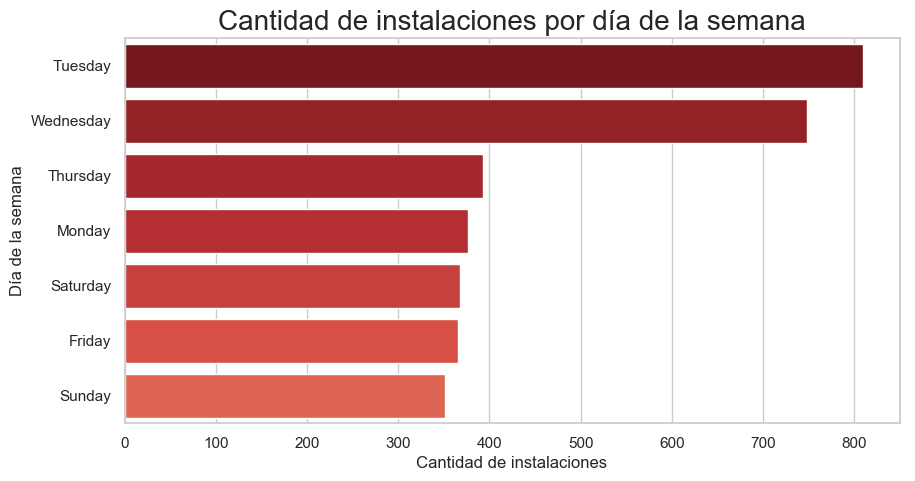

In [34]:
serie_installs_per_weekday = installs['weekday'].value_counts()

g = sns.barplot(y=serie_installs_per_weekday.index, x=serie_installs_per_weekday.values, \
                palette=sns.color_palette("Reds_r", 15));
g.set_title('Cantidad de instalaciones por día de la semana', fontsize=20);
g.set_xlabel('Cantidad de instalaciones');
g.set_ylabel('Día de la semana');

Como vimos anteriormente, los datos analizados corresponden al período del 5 al 13 de Marzo de 2019, por lo que los días Miércoles y Jueves suman la cantidad de subastas de dos semanas distintas.

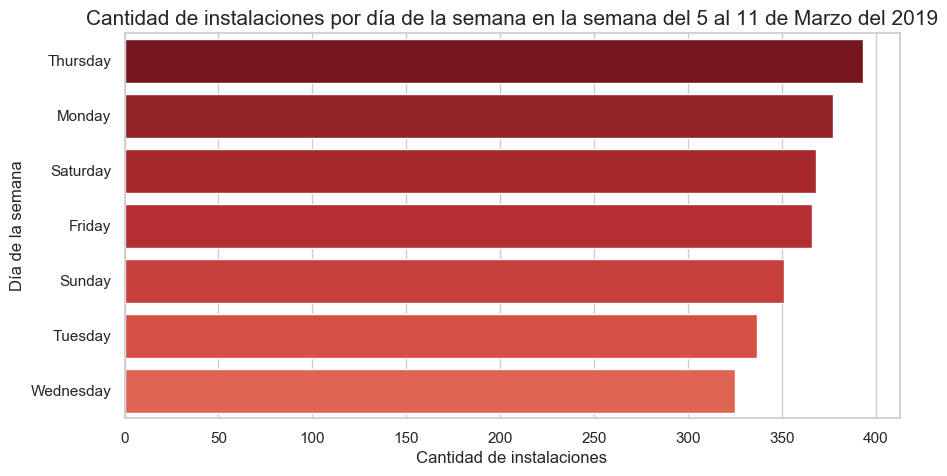

In [35]:
serie_installs_per_weekday_first_week = installs.loc[(installs['day'] <= 11)]['weekday'].value_counts()

g = sns.barplot(y=serie_installs_per_weekday_first_week.index, x=serie_installs_per_weekday_first_week.values, \
                palette=sns.color_palette("Reds_r", 15));
g.set_title('Cantidad de instalaciones por día de la semana en la semana del 5 al 11 de Marzo del 2019', fontsize=15);
g.set_xlabel('Cantidad de instalaciones');
g.set_ylabel('Día de la semana');

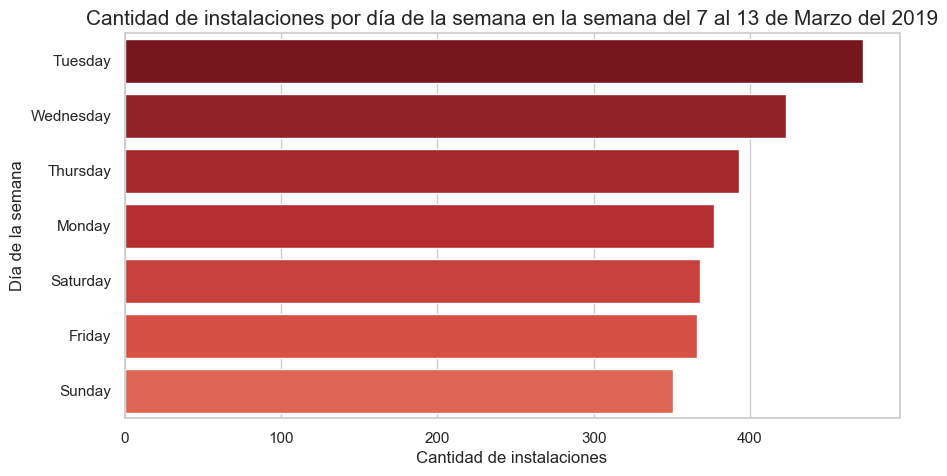

In [36]:
serie_installs_per_weekday_second_week = installs.loc[(installs['day'] >= 7)]['weekday'].value_counts()

g = sns.barplot(y=serie_installs_per_weekday_second_week.index, x=serie_installs_per_weekday_second_week.values, \
                palette=sns.color_palette("Reds_r", 15));
g.set_title('Cantidad de instalaciones por día de la semana en la semana del 7 al 13 de Marzo del 2019', fontsize=15);
g.set_xlabel('Cantidad de instalaciones');
g.set_ylabel('Día de la semana');

#### 2 - Cantidad de instalaciones por hora

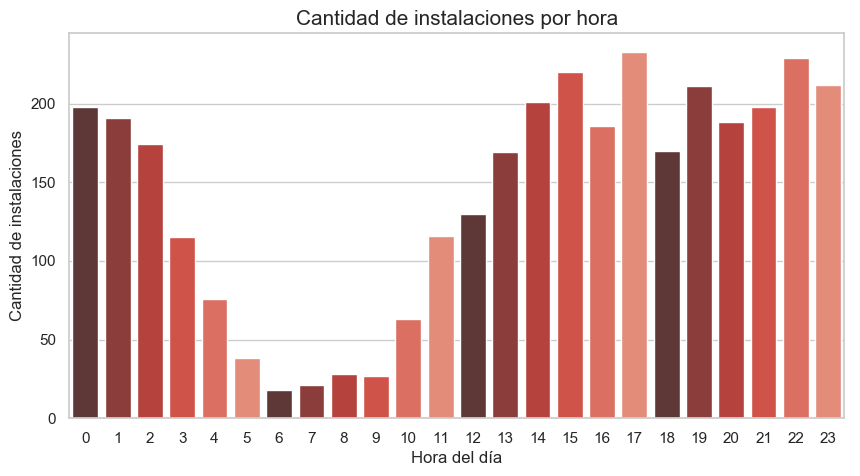

In [37]:
serie_installs_per_hour = installs['hour'].value_counts()

g = sns.barplot(y=serie_installs_per_hour.values, x=serie_installs_per_hour.index, \
                palette=sns.color_palette("Reds_d"));
g.set_title('Cantidad de instalaciones por hora', fontsize=15);
g.set_xlabel('Hora del día');
g.set_ylabel('Cantidad de instalaciones');

#### 3 - Cantidad de instalaciones por día y hora

3.1 - Cantidad de instalaciones por número día y hora

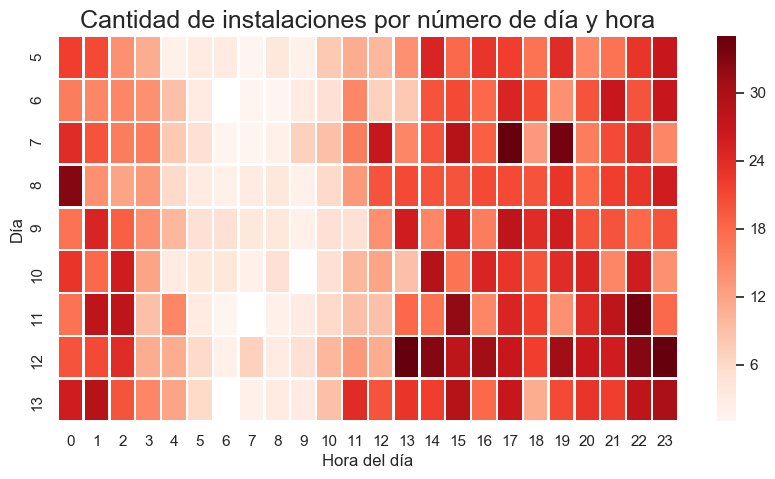

In [38]:
installs_per_day_hour = installs.groupby(['day','hour']).size().reset_index()
installs_per_day_hour.columns=['day','hour','size']
installs_per_day_hour = installs_per_day_hour.pivot(index='day', columns='hour',values='size')

g = sns.heatmap(installs_per_day_hour, annot=False, linewidths=1, cmap='Reds');
g.set_title('Cantidad de instalaciones por número de día y hora', fontsize=18);
g.set_xlabel('Hora del día');
g.set_ylabel('Día');

3.2 - Cantidad de instalaciones por día de la semana y hora

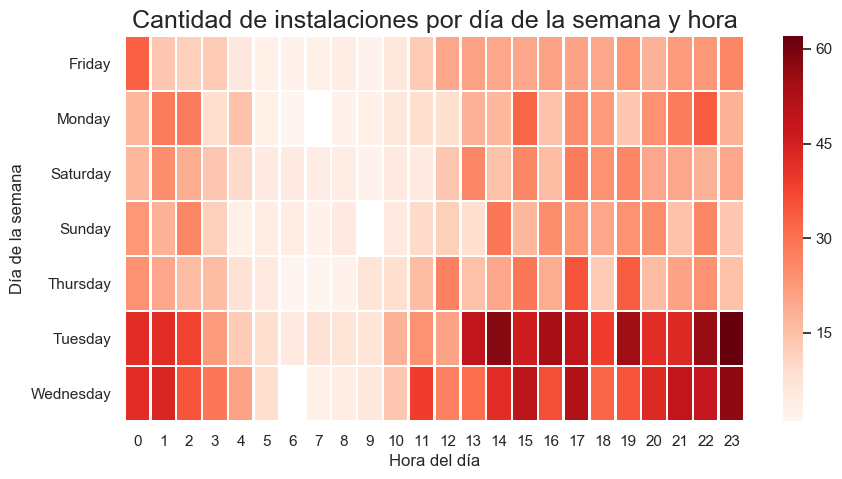

In [39]:
installs_per_weekday_hour = installs.groupby(['weekday','hour']).size().reset_index()
installs_per_weekday_hour.columns=['weekday','hour','size']
installs_per_weekday_hour = installs_per_weekday_hour.pivot(index='weekday', columns='hour',values='size')

g = sns.heatmap(installs_per_weekday_hour, annot=False, linewidths=1, cmap='Reds');
g.set_title('Cantidad de instalaciones por día de la semana y hora', fontsize=18);
g.set_xlabel('Hora del día');
g.set_ylabel('Día de la semana');

#### 4 - Cantidad de instalaciones por aplicación

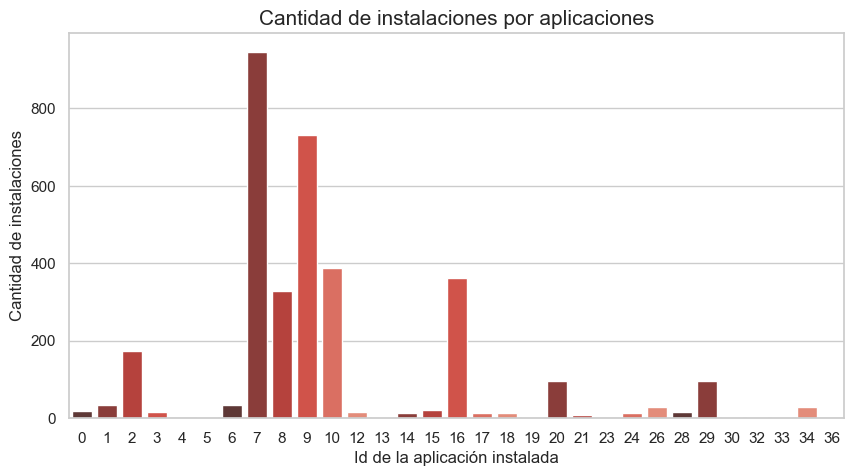

In [48]:
serie_installs_per_app = installs['application_id'].value_counts()

g = sns.barplot(y=serie_installs_per_app.values, x=serie_installs_per_app.index, \
                palette=sns.color_palette("Reds_d"));
g.set_title('Cantidad de instalaciones por aplicaciones', fontsize=15);
g.set_xlabel('Id de la aplicación instalada');
g.set_ylabel('Cantidad de instalaciones');

#### 5 - Cantidad de instalaciones según la conexión

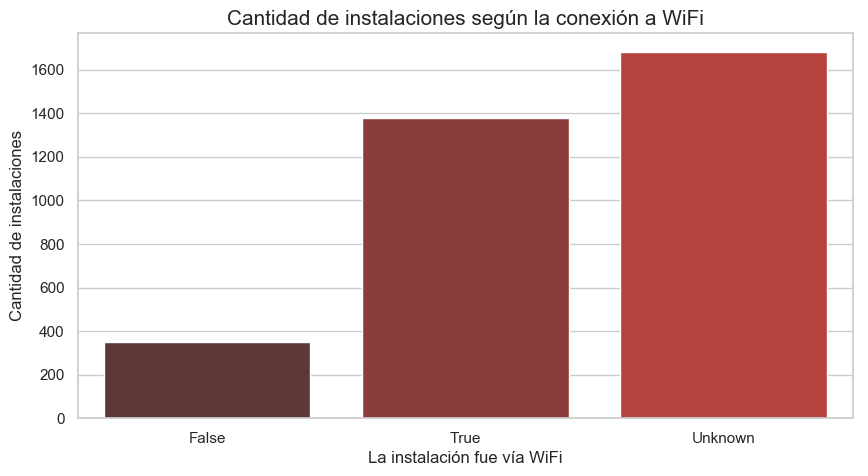

In [41]:
serie_installs_per_connection = installs['wifi'].value_counts()

g = sns.barplot(y=serie_installs_per_connection.values, x=serie_installs_per_connection.index, \
                palette=sns.color_palette("Reds_d"));
g.set_title('Cantidad de instalaciones según la conexión a WiFi', fontsize=15);
g.set_xlabel('La instalación fue vía WiFi');
g.set_ylabel('Cantidad de instalaciones');

#### 6 - Tipo de la instalación

6.1 - Instalaciones implícitas

Utilizaremos un gráfico de torta para poder observar el porcentaje de si la instalación fue implícita o no. 

Text(0, 0.5, '')

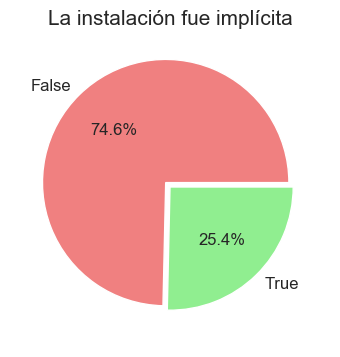

In [42]:
installs_implicit = installs['implicit'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(4,4),fontsize=12,colors=['lightcoral','lightgreen'],explode=(0.05, 0))
installs_implicit.set_title("La instalación fue implícita",fontsize=15)
installs_implicit.set_ylabel("")

+ Aquí podemos ver el que casi el 75% de los usuarios instalaron la aplicación sin seguir el *link* generado por la publicidad mostrara en el dispositivo.

#### 7 - Según las características del dispositivo

7.1 - Según la marca

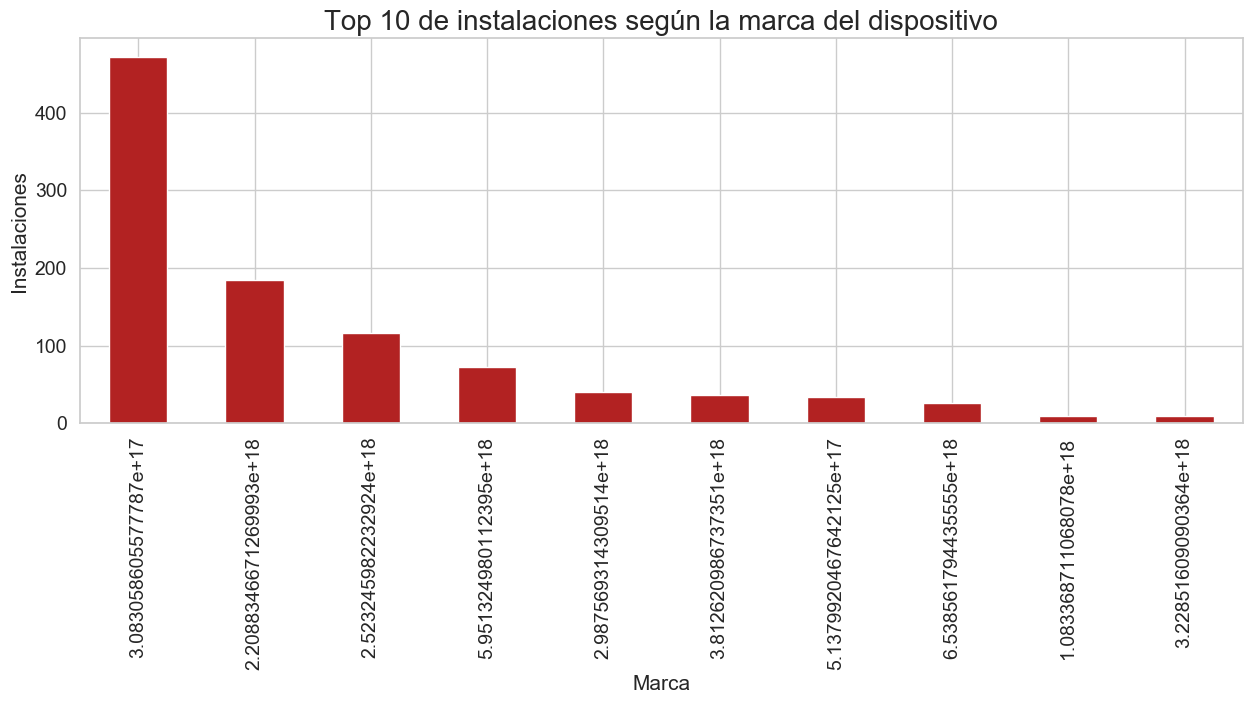

In [43]:
installs['device_brand'].value_counts().head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Top 10 de instalaciones según la marca del dispositivo',size=20)
plt.ylabel("Instalaciones", size=15)
plt.xlabel("Marca", size=15)
plt.show()

7.2 - Según el modelo

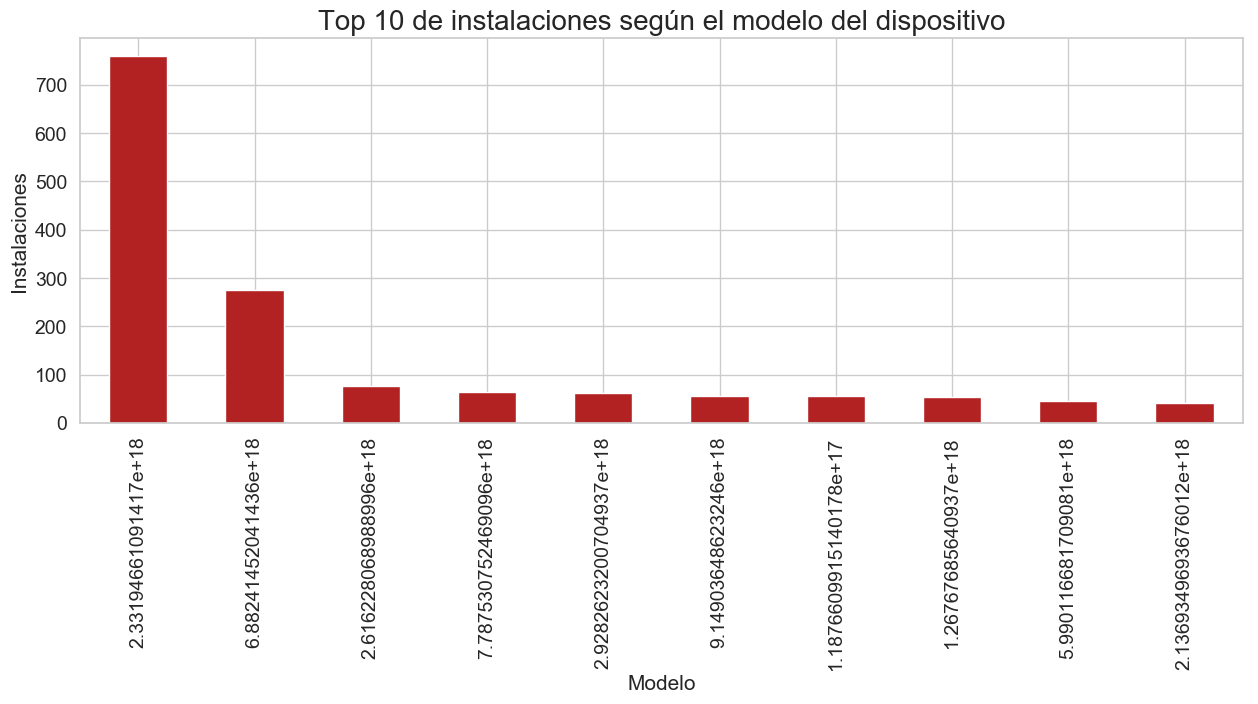

In [44]:
installs['device_model'].value_counts().head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Top 10 de instalaciones según el modelo del dispositivo',size=20)
plt.ylabel("Instalaciones", size=15)
plt.xlabel("Modelo", size=15)
plt.show()

Observando ambos gráficos, podemos ver que hay un valor que sobresalta con respecto a los demás, en los cuales la cantidad de instalaciones se vuelve muy menor. 
Lamentablemente no tenemos información adicional para poder determinar que marca y modelo representan los valores correspondientes para poder sacar una mejor conclusión.

7.3 - Cantidad según cada dispositivo

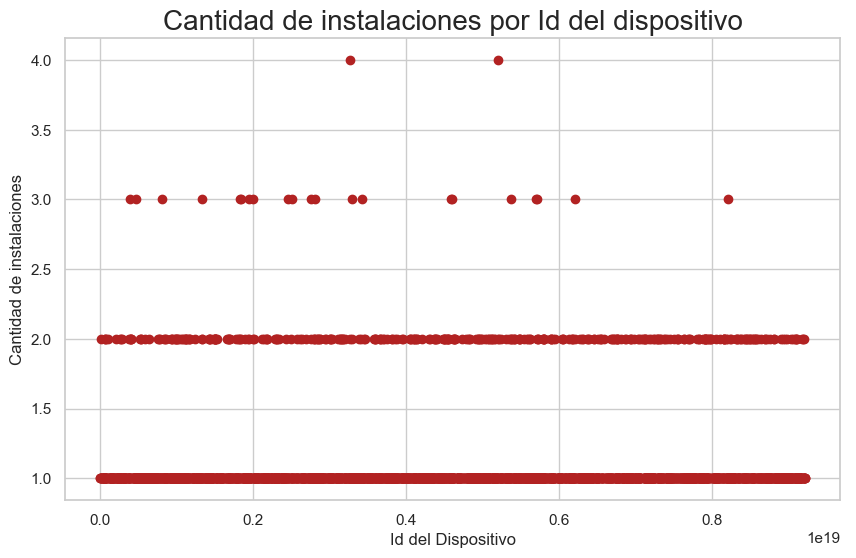

In [46]:
installs_per_device = installs.groupby('ref_hash').size().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(installs_per_device['ref_hash'].values, installs_per_device[0].values, color='firebrick')
plt.title('Cantidad de instalaciones por Id del dispositivo', fontsize=20)
plt.ylabel('Cantidad de instalaciones');
plt.xlabel('Id del Dispositivo');

Vemos que solo dos usuarios realizaron 4 instalaciones. Siendo la media de 1.13 instalaciones.

#### 8 - Según identificador del anunciante

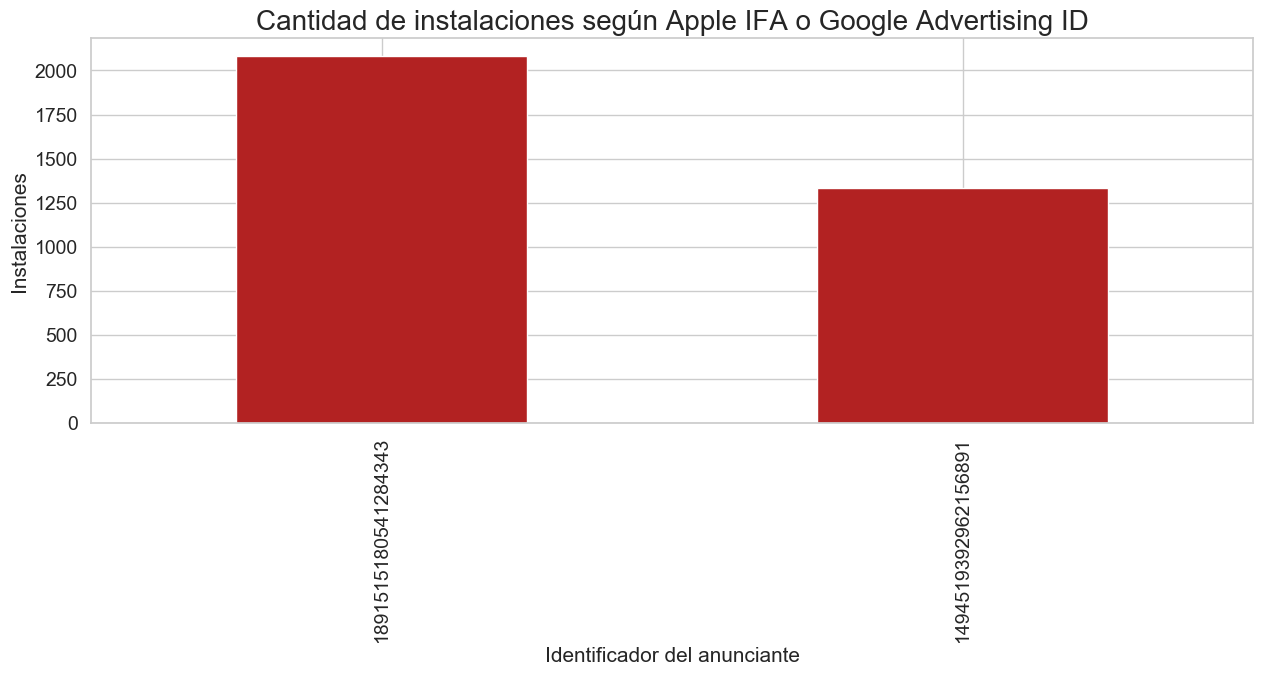

In [47]:
installs['ref_type'].value_counts().plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Cantidad de instalaciones según Apple IFA o Google Advertising ID',size=20)
plt.ylabel("Instalaciones", size=15)
plt.xlabel("Identificador del anunciante", size=15)
plt.show()

Aquí vemos que hay un identificador del anunciante que tiene un poco menos de 1000 instalaciones más. El identificador puede ser *Apple IFA* o bien *Google Advertising ID*.